# <center>Churn Analysis and Customer Retention Strategies for a Telecommunication Company</center>

##  Business Understanding

### Background
The telecommunication industry is highly competitive, with companies vying for customers' attention and loyalty. One of the significant challenges faced by telecommunication companies is customer churn, which refers to the rate at which customers stop using their services and switch to competitors. Customer churn can have a detrimental impact on a company's revenue and profitability, as acquiring new customers is often more costly than retaining existing ones. To address this challenge, this project aims to assist a telecommunication company in analyzing customer churn patterns, identifying factors influencing churn, and developing effective customer retention strategies by leveraging machine learning techniques.

###  Business Objective
The primary objective of this churn analysis project is to help the telecommunication company reduce customer churn and enhance customer retention through data-driven insights and predictive modeling to ultimately achieve higher revenue and profitability.

###  Hypothesis


**Null Hypothesis (H0):** The monthly charges do not have a significant impact on the churn. 

**Alternative Hypothesis (H1):** The monthly charges significantly impact the churn. 



 ### Questions
1.  Which gender exhibited the highest churn?
2.	How does the churn vary based on different contract types? 
3.	Which internet service type has the highest churn? 
4.	Does the presence of dependents affect customer churn? 
5.	Are customers with higher monthly charges more likely to churn? 
6.	Is there a correlation between senior citizens and churn?
7.	Do paperless billing and payment methods influence churn? 


### Install required packages


In [1]:
#Libraries for sql
import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

#libraries for handling data
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

#libraries for visulation
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.offline as offline
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go
offline.init_notebook_mode(connected=True) # Configure Plotly to run offline

#Feature processing libraries
from sklearn.impute import SimpleImputer

### Create a connection by accessing connection string with defined environment variables


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


In [3]:
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [5]:
# Now the sql query to get the data is what what you see below. 
query = "Select * from dbo.LP2_Telco_churn_first_3000"


## Data Understanding



###  Resources availability 
Data for this project

In this project, the dataset resides in 3 places. For ease of access and security we have made the datasets available there in the GitHub Repository 

- First Data Set

The data called LP2_Telco_churn_First_3000 was extracted from a database.

- Second Data Set

The data called Telco-churn-second-2000.xlsx was found in OneDrive which is our test dataset

- Third Data Set

The third part of the data called LP2_Telco-churn-last-2000.csv. is hosted on a GitHub Repository 


###  Column names and description
**Gender** -- Whether the customer is a male or a female

**SeniorCitizen** -- Whether a customer is a senior citizen or not

**Partner** -- Whether the customer has a partner or not (Yes, No)

**Dependents** -- Whether the customer has dependents or not (Yes, No)

**Tenure** -- Number of months the customer has stayed with the company

**Phone Service** -- Whether the customer has a phone service or not
(Yes, No)

**MultipleLines** -- Whether the customer has multiple lines or not

**InternetService** -- Customer's internet service provider (DSL, Fiber
Optic, No)

**OnlineSecurity** -- Whether the customer has online security or not
(Yes, No, No Internet)

**OnlineBackup** -- Whether the customer has online backup or not (Yes,
No, No Internet)

**DeviceProtection** -- Whether the customer has device protection or
not (Yes, No, No internet service)

**TechSupport** -- Whether the customer has tech support or not (Yes,
No, No internet)

**StreamingTV** -- Whether the customer has streaming TV or not (Yes,
No, No internet service)

**StreamingMovies** -- Whether the customer has streaming movies or not
(Yes, No, No Internet service)

**Contract** -- The contract term of the customer (Month-to-Month, One
year, Two year)

**PaperlessBilling** -- Whether the customer has paperless billing or
not (Yes, No)

**Payment Method** -- The customer's payment method (Electronic check,
mailed check, Bank transfer(automatic), Credit card(automatic))

**MonthlyCharges** -- The amount charged to the customer monthly

**TotalCharges** -- The total amount charged to the customer

**Churn** -- Whether the customer churned or not (Yes or No)


### Data Loading

In [6]:
data=pd.read_sql(query,connection)
data1=pd.read_csv("C:\\Users\\User\\Desktop\\hub\\Churn-Analysis-LP2-Project-\\Datasets\\LP2_Telco-churn-last-2000.csv")
data2=pd.read_excel("C:\\Users\\User\\Desktop\\hub\\Churn-Analysis-LP2-Project-\\Datasets\\Telco-churn-second-2000.xlsx")

## Exploratory Data Analysis
Here we will analyze and investigate data sets and summarize their characteristics by using data visualization,
also since we will concatenate all the data sets after cleaning we will rename the colums after cleaning each dataset

### EDA On Telco Churn 3000

In [7]:
#view the data set
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [8]:
#check for duplicated values
data.duplicated().sum()

0

In [9]:
#General info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [10]:
#check the number of rows and columns
data.shape

(3000, 21)

In [11]:
#view number of missing values
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

#### Notes on data (Telco churn First 3000)
* We have a total of 3000 rows
* We have a total of 21 columns
* Our target variable has true/false attributes, therefore it is a binary classification problem
* Online Security,Online Backup,Device Protection,tech support,streaming tv,streaming movies all have 651 missing values and multiple lines has 269 missing values
* There are no duplicated values

### EDA On Telco Churn last 2000

In [12]:
#view data set
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [13]:
#check for duplicated values
data1.duplicated().sum()

0

In [14]:
#General info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [15]:
#check number of rows and columns
data1.shape

(2043, 21)

In [16]:
#check number of missing values
data1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Notes on Telco Churn last 2000
* We have a total of 2043 rows
* We have a total of 21 columns
* Our target variable has yes/no attributes, therefore it is a binary classification problem
* The TotalCharges column is an object data type, so we will check that.
* There are no missing values
* There are no duplicated values

##### We observed that the dataset which is the telco churn 3000 has a lot of missing values so we will like to check the percentage of the columns that had missing values to observe whether it is relevant to our dataset

In [17]:
# # Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100


In [18]:

# Filter the columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0]


In [19]:
# Display the missing percentage for columns with missing values
fig = go.Figure()
fig.add_trace(go.Bar(x=columns_with_missing.index, y=columns_with_missing.values, marker=dict(color='darkblue')))

# Update layout 
fig.update_layout(title='Percentage of Missing Values in Columns', xaxis_title='Columns', yaxis_title='Percentage')

# Display the plot
fig.show()


## Notes

##### After checking the percentage we observed that about 6 columns have 21.7% of data missing whiles others like Multiplelines,total charges and churn have 8.97%,0.167% and 0.03 respectively.These percentages show that the missing values in these columns can be removed but to maintain more data for our model to train we will explore further to determine how to handle the missing values

The dataset telco churn last 2000 has no missing values therefore we wanted to explore if that dataset can help in a way to impute the missing values in telco churn first 3000

In [20]:
#put all missing values in a variable
missing=data.isnull().any()


In [21]:
#we exclude missing values that are zero
missing = missing[missing]

In [22]:
# Compare unique values in columns with missing values to corresponding columns in data1
for col in missing.index:
    if col not in ["TotalCharges", "Churn"]:
        print(f"Unique values in {col} column of first dataset:\n{data[col].unique()}")
        print(f"Unique values in {col} column of second dataset:\n{data1[col].unique()}")
        print("-------------------------------------")


Unique values in MultipleLines column of first dataset:
[None False True]
Unique values in MultipleLines column of second dataset:
['No' 'No phone service' 'Yes']
-------------------------------------
Unique values in OnlineSecurity column of first dataset:
[False True None]
Unique values in OnlineSecurity column of second dataset:
['No' 'Yes' 'No internet service']
-------------------------------------
Unique values in OnlineBackup column of first dataset:
[True False None]
Unique values in OnlineBackup column of second dataset:
['No' 'Yes' 'No internet service']
-------------------------------------
Unique values in DeviceProtection column of first dataset:
[False True None]
Unique values in DeviceProtection column of second dataset:
['No' 'Yes' 'No internet service']
-------------------------------------
Unique values in TechSupport column of first dataset:
[False True None]
Unique values in TechSupport column of second dataset:
['Yes' 'No' 'No internet service']
-------------------

## Notes
After comparing the unique values between the two datasets,we noticed:
* For multiplelines values, the first dataset contained True,False,None and the second conatined Yes,No,No Phone service.Therefore we assume the missing values for the Multiplelines in the first dataset will also be imputed with No phone service as seen in the second dataset
* For OnlineSecurity values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the OnlineSecurity in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For OnlineBackup values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the OnlineBackup in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For DeviceProtection values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the DeviceProtection in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For TechSupport values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the Techsupport in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For StreamingTV values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the StreamingTV in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For StreamingMovies values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the StreamingMovies in the first dataset will also be imputed with No Internet service as seen in the second dataset

#### After determing how the missing values will be imputed we will concatenate  the dataset from the database(Telco churn first 3000) and the data from  the github repository(Teleco churn last 2000)

In [23]:
## concatenation
Telco_churn=pd.concat([data,data1],ignore_index=True)

In [24]:
#view telco churn
Telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [25]:
#general summary info
Telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


### Converting the totalcharges column to a numerical variable
From .info(), we realized that the TotalCharge feature was an object data type; however, looking at it, it was in numeric  there we will be chaning it to a numeric data type

In [26]:
#convert it to numerical
Telco_churn["TotalCharges"]= pd.to_numeric(Telco_churn["TotalCharges"], errors="coerce")

In [27]:
#check datatype of totalcharges
Telco_churn["TotalCharges"].dtype

dtype('float64')

##### Before concatinating both datasets,the dataset telco churn 3000 contained true,false values and the other yes or no.Therefore most columns in the concatinated dataset contain yes and no and true or false so to ensure uniformity we will choose one.The reason we are choosing  yes or no is that from our data understanding we observed the values needed to be present in the dataset are yes or no

In [28]:
#replace all true or false in the dataset to yes or no
Telco_churn.replace({True: "Yes", False: "No"}, inplace=True)

### Handling Missing Values

In [29]:
#before we impute the missing values we want to check the number of missing values in each column
Telco_churn.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

## Imputing missing values in Total charges column

#### We want to visualise the Total Charges Column to determine which method we will use to impute the missing values

In [49]:
#Create a box plot for the "TotalCharges" column
fig = go.Figure()
fig.add_trace(go.Box(y=Telco_churn["TotalCharges"], name="TotalCharges",marker=dict(color='darkblue')))

# Update layout
fig.update_layout(title='Box Plot of TotalCharges', yaxis_title='TotalCharges')

# Display the plot
fig.show()


#### From the boxplot you can tell there is no outlier therefore the missing values will be imputed with mean since mean is sensitive to outliers


In [31]:
#we create a variable to contain our amount column so it will be easier to impute the missing values
num_cols=["TotalCharges"]

In [32]:
#Create the SimpleImputer object and fit it to the data
impute=SimpleImputer(strategy="mean").fit(Telco_churn[num_cols])

In [33]:
# Transform the data to impute missing values
imputed_data = impute.transform(Telco_churn[num_cols])


In [34]:
# Convert the imputed data back to a DataFrame with the original columns
imputed_df = pd.DataFrame(imputed_data, columns=num_cols)


In [35]:
# Update the main dataframe with the imputed values
Telco_churn[num_cols] = imputed_df

In [36]:
#view missing value in total charges column to check if missing values still exist
Telco_churn["TotalCharges"].isnull().sum()

0

## Imputing missing values in Churn column

In [37]:
#view number of missing values in churn column
Telco_churn["Churn"].isnull().sum()

1

In [38]:
#we view churn colums
Telco_churn["Churn"]

0         No
1         No
2        Yes
3         No
4        Yes
5        Yes
6         No
7         No
8        Yes
9         No
10        No
11        No
12        No
13       Yes
14        No
15        No
16        No
17        No
18       Yes
19        No
20       Yes
21        No
22       Yes
23        No
24        No
25        No
26       Yes
27       Yes
28        No
29       Yes
30        No
31        No
32        No
33        No
34        No
35        No
36       Yes
37        No
38       Yes
39       Yes
40        No
41        No
42        No
43        No
44        No
45        No
46        No
47       Yes
48        No
49        No
50        No
51       Yes
52        No
53       Yes
54        No
55       Yes
56        No
57        No
58        No
59        No
60        No
61        No
62        No
63        No
64       Yes
65        No
66        No
67        No
68        No
69        No
70        No
71        No
72        No
73        No
74        No
75        No
76        No

#### After viewing the churn column and realising it has only one missing value we decided to fill it with the most occuring

In [39]:
# Calculate the mode of the "Churn" column
churn_mode = Telco_churn["Churn"].mode()


In [40]:
# Count the occurrences of each value in the "Churn" column
churn_counts = Telco_churn["Churn"].value_counts()


In [41]:
# Create a bar plot to visualize the counts
fig = go.Figure(go.Bar(x=churn_counts.index, y=churn_counts.values, marker=dict(color='darkblue')))

# Update layout 
fig.update_layout(title='Churn Mode and Counts', xaxis_title='Churn', yaxis_title='Counts')

# Display the plot
fig.show()

#### From our visual you can see No appears the most with 3706 therefore we will fill the missing value in the churn column will be filled with mode

In [42]:
#replace missing value with mode which is no
Telco_churn["Churn"].fillna("No",inplace=True)


In [43]:
##check churn column to see if changes were made
Telco_churn["Churn"].isnull().sum()

0

#### Imputing missing values in multiple lines,online security,online backup,device protection,tech support,streaming movies,streaming tv columns

In [44]:
# Calculate the number of missing values in each column
missing_values = Telco_churn.isnull().sum()


In [45]:
# Filter the columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


MultipleLines       269
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
dtype: int64


#### From our eda we deduced that MultipleLines will be imputed with no phone service and OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies will all be imputed with no internet service

In [46]:
#replacing the missing values of the reamining columns
Telco_churn["MultipleLines"].fillna("No phone service",inplace=True)
Telco_churn["OnlineSecurity"].fillna("No internet service",inplace=True)
Telco_churn["OnlineBackup"].fillna("No internet service",inplace=True)
Telco_churn["DeviceProtection"].fillna("No internet service",inplace=True)
Telco_churn["TechSupport"].fillna("No internet service",inplace=True)
Telco_churn["StreamingMovies"].fillna("No internet service",inplace=True)
Telco_churn["StreamingTV"].fillna("No internet service",inplace=True)

In [47]:
#check missing values in the dataset
Telco_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
#There are no missing values in the dataset

In [51]:
### I am saving it so that I can use it for power BI
Telco_churn.to_csv("C:\\Users\\User\\Desktop\\bi\\Churn_Analysis.csv")

## Univariate Analysis 

### Describing The Data

In [55]:
Telco_churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000
mean,32.576641,65.090214,2302.062861
std,24.529807,30.068133,2267.682399
min,0.000000,18.400000,18.799999
25%,9.000000,35.775000,418.000000
50%,29.000000,70.550003,1406.000000
75%,56.000000,90.050003,3857.575073
max,72.000000,118.650002,8670.100000


### Notes on the .describe()
#### Tenure
* This variable represents the number of months the customer has been with the company
* The output shows that on average a customer 32.57 months with the company but it has a high standard deviation of 24.53 months which indicates greater variability in customer tenures.
* The output shows the maximum amount of months a customer stays with comapny is 72
* 75% of customers spend 56 or lower months with the company

#### Monthly Charges
* This variable represents the amount charged to the customer monthly.
* The output shows that averagely a customer is charged 65.09 per month with 75% paying 90.05 or lower
* A standard deviation of 30.07 in this case indicates greater variability in total charges. 

#### Total Charges
* This variable represents the total amount charged to the customer
* The average total charge across all customers, which is approximately 2302.06,whiles 75% of customers have a total charge of 3857.58 or lower.
* Has a  large stanadrd deviation of 2267.68 which indicates greater variability in total charges.



array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

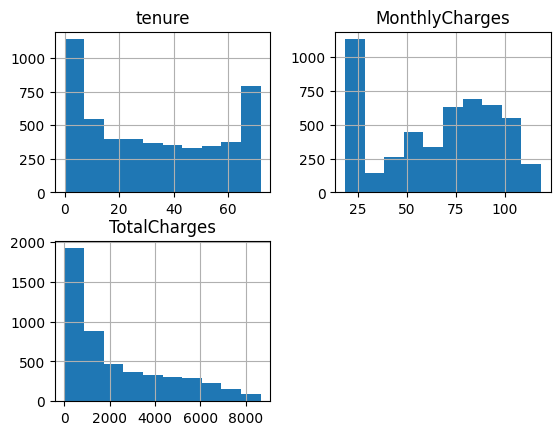

In [58]:
Telco_churn.hist()